 **Provide Drop Down with various Transformations on an image and then perform Reflection for
which input must be taken from use using GUI for reflection in X direction or in Y directions,
on the following images. Also Deploy the same on Heruko and provide the URL.**

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
#import matplotlib.image as mpimg 
#from matplotlib.pyplot import imshow
#%matplotlib inline

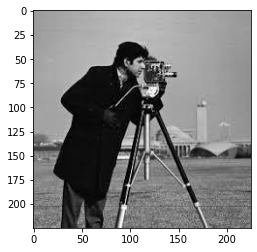

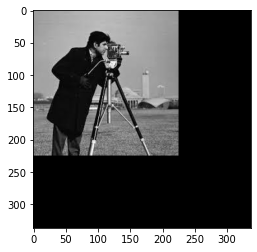

In [7]:
Direction = "Y" #@param ["X", "Y"]
Transformation = "Shearing" #@param ["Shearing", "Scaling", "Translation", "Reflection"]
Y_factor =  0#@param {type:"number"}
X_Factor =  0#@param {type:"number"}
img_T = cv.imread('/content/DIP1.png')
image = cv.cvtColor(img_T, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

if Transformation == "Translation": 
  if Direction == "Y":
    M = np.float32([[1, 0, 20], 
                [0, 1, Y_factor], 
                [0, 0, 1]])
    img1 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))
  else:
    M = np.float32([[1, 0, X_Factor], 
                [0, 1, 100], 
                [0, 0, 1]])
    img1 = cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))
  plt.imshow(img1)
  plt.show()
if Transformation == "Shearing": 
  rows, cols, dim = image.shape
  if Direction == "Y":
     M1 = np.float32([[1, Y_factor, 0],
             	[0, 1  , 0],
            	[0, 0  , 1]])
     sheared_img = cv.warpPerspective(image,M1,(int(cols*1.5),int(rows*1.5)))
  else:
    M1 = np.float32([[1, 0, 0],
             	[X_Factor, 1  , 0],
            	[0, 0  , 1]])
    sheared_img = cv.warpPerspective(image,M1,(int(cols*1.5),int(rows*1.5)))
  plt.imshow(sheared_img)
  plt.show()

if Transformation == "Scaling": 
  rows, cols, dim = image.shape
  if Direction == "Y":
    M = np.float32([[1, 0  , 0],
            	[0,   Y_factor, 0],
            	[0,   0,   1]])
    scaled_img = cv.warpPerspective(image,M,(cols,rows))
  else:
    M = np.float32([[X_Factor, 0  , 0],
            	[0,   1, 0],
            	[0,   0,   1]])
    scaled_img = cv.warpPerspective(image,M,(cols,rows))
  plt.imshow(scaled_img)
  plt.show()

if Transformation == "Reflection": 
  rows, cols, dim = image.shape  
  if Direction == "Y":
    M = np.float32([[-1,  0, cols],
                [0, -1, rows],
                [0,  0, 1   ]])
    reflected_img = cv.warpPerspective(image,M,(int(cols),int(rows)))  
  else:
    M = np.float32([[-1,  0, cols],
                [0, -1, rows],
                [0,  0, 1   ]])
    reflected_img = cv.warpPerspective(image,M,(int(cols),int(rows)))   
  plt.imshow(reflected_img)
  plt.show()

# **2. Apply appropriate mask on an image to perform identify the points in an image at which the image brightness changes sharply i.e. detecting edges.**

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]
<class 'numpy.ndarray'>


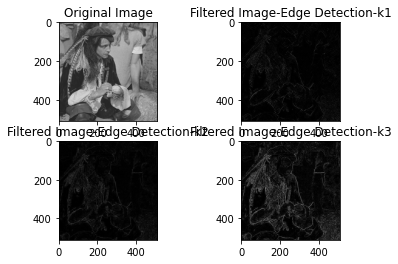

In [6]:
def main():
    #img = cv2.imread("/content/DIP2.png", 1)
    img = cv2.imread("/content/DIP2.png", 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    k1 = np.array(([1, 0, -1], [0, 0, 0], [-1, 0, 1]), np.float32)
    k2 = np.array(([0, -1, 0], [-1, 4, -1], [0, -1, 0]), np.float32)
    k3 = np.array(([-1, -1, -1], [-1, 8, -1], [-1, -1, -1]), np.float32)
    print(k2)
    print(type(k2))

    output1 = cv2.filter2D(img, -1, k1)
    output2 = cv2.filter2D(img, -1, k2)
    output3 = cv2.filter2D(img, -1, k3)

    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    
    plt.subplot(2, 2, 2)
    plt.imshow(output1)
    plt.title('Filtered Image-Edge Detection-k1')
    
    plt.subplot(2, 2, 3)
    plt.imshow(output2)
    plt.title('Filtered Image-Edge Detection-k2')

    plt.subplot(2, 2, 4)
    plt.imshow(output3)
    plt.title('Filtered Image-Edge Detection-k3')

    plt.show()

if __name__ == "__main__":
    main()